In [2]:
import sklearn
print(sklearn.__all__)

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']


In [3]:
# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

#visual your data

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2 )

%matplotlib inline # it because we are running it on a web support

In [18]:
heart_data=pd.read_csv('heart.csv')

In [19]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


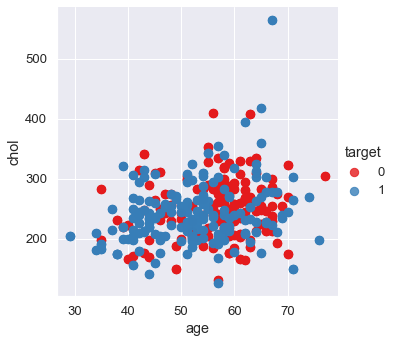

In [20]:
# plot our data
sns.lmplot('age','chol', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});

/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


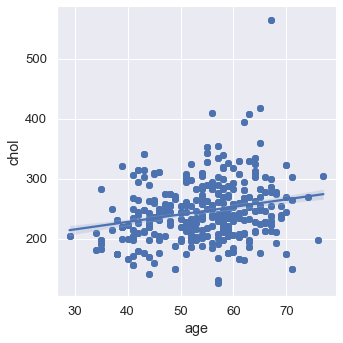

In [21]:
# plot our data
sns.lmplot('age','chol', data=heart_data); # scatter plot relationship betweesome features

This shows age and cholestrol level are clustered together and headed towards the same direction

In [28]:
# format or preprocessing our data
type_label = np.where(heart_data['target']== 0, 'No','Yes')
type_label
heart_data_features = heart_data.columns.values[:12]
heart_data_features

In [52]:
attributes=heart_data[['age','chol','cp','trestbps', 'sex','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
print(attributes)

[[ 52. 212.   0. ...   2.   2.   3.]
 [ 53. 203.   0. ...   0.   0.   3.]
 [ 70. 174.   0. ...   0.   0.   3.]
 ...
 [ 47. 275.   0. ...   1.   1.   2.]
 [ 50. 254.   0. ...   2.   0.   2.]
 [ 54. 188.   0. ...   1.   1.   3.]]


In [51]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

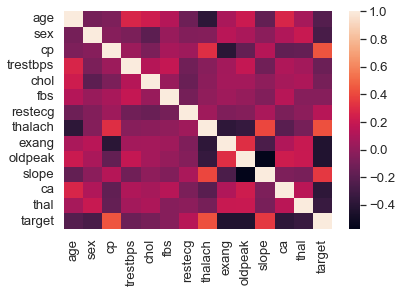

In [58]:
sns.heatmap(heart_data.corr())

# support vector machine

In [53]:
# fit model
model = svm.SVC(kernel = 'linear')
model.fit(attributes,heart_data['target'])

SVC(kernel='linear')

In [62]:
model.coef_

array([[ 0.00583948, -0.00271366,  0.66115841, -0.01618626, -1.08974154,
         0.02308396,  0.16983089,  0.01556391, -0.6405028 , -0.47883002,
         0.41713028, -0.51423648, -0.8394406 ]])

In [63]:
# get the separating hyperplane
w=model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a * xx-(model.intercept_[0]/w[1])


"""something like generating a simple regression line but this is way beyond that, this multiple linear regression, 
 i'm just going to be using the intercept and the first slope to explain in this concept.""" 

In [66]:
# plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1]-a * b[0])
b = model. support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [72]:
heart_data[:12].corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.138964,NaN,0.024799,-0.609696,-3.045604e-01,0.542679,-0.366151,-0.201061,-0.052489,-3.218115e-01,4.478829e-02,-0.312467,0.420940
sex,-0.138964,1.000000,NaN,0.391779,-0.133678,-4.082483e-01,0.092057,0.575354,0.239046,0.042381,0.000000e+00,1.530931e-01,0.273861,-0.632456
cp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.024799,0.391779,NaN,1.000000,-0.005391,2.442769e-01,-0.091805,0.274592,0.517647,-0.180330,-4.273955e-02,8.724175e-03,0.608645,-0.639731
chol,-0.609696,-0.133678,NaN,-0.005391,1.000000,3.240833e-01,-0.141235,-0.218056,0.168624,0.375138,-6.375390e-02,4.508621e-01,-0.292873,-0.379803
fbs,-0.304560,-0.408248,NaN,0.244277,0.324083,1.000000e+00,-0.225494,-0.146805,0.292770,0.330662,-2.721655e-01,1.850372e-17,0.149071,-0.258199
restecg,0.542679,0.092057,NaN,-0.091805,-0.141235,-2.254938e-01,1.000000,0.047549,-0.506137,0.234090,-1.841149e-01,5.637345e-01,-0.504219,-0.058222
thalach,-0.366151,0.575354,NaN,0.274592,-0.218056,-1.468045e-01,0.047549,1.000000,-0.071112,-0.297598,3.465200e-01,-1.241166e-01,0.519255,-0.332873
exang,-0.201061,0.239046,NaN,0.517647,0.168624,2.927700e-01,-0.506137,-0.071112,1.000000,0.398488,-4.780914e-01,-2.927700e-01,0.392792,-0.377964
oldpeak,-0.052489,0.042381,NaN,-0.180330,0.375138,3.306616e-01,0.234090,-0.297598,0.398488,1.000000,-7.816981e-01,2.710656e-01,-0.495214,-0.232303


/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

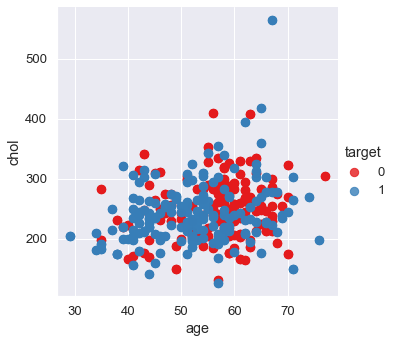

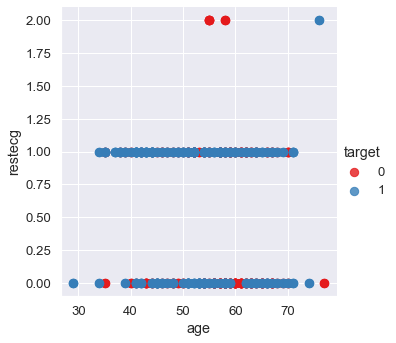

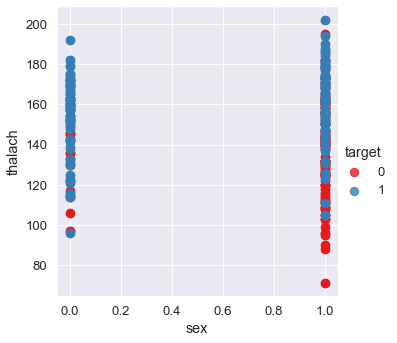

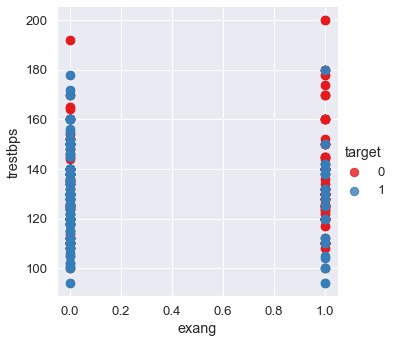

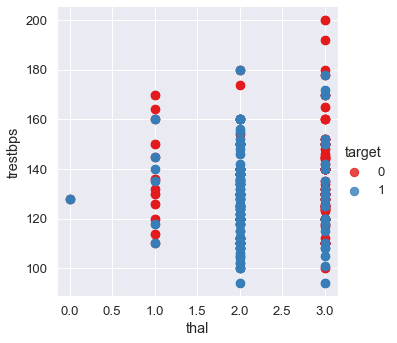

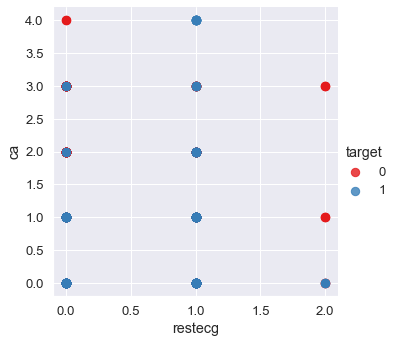

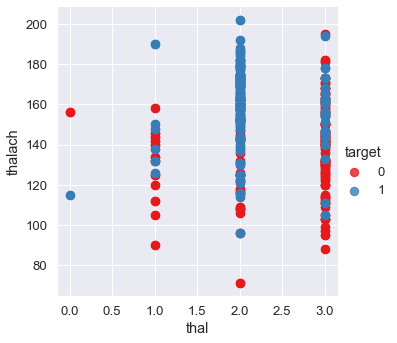

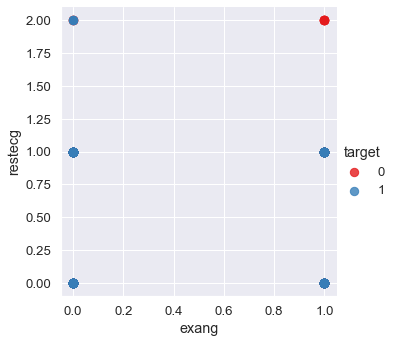

In [74]:
sns.lmplot('age','chol', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('age','restecg', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('sex','thalach', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('exang','trestbps', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('thal','trestbps', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('restecg','ca', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
sns.lmplot('thal','thalach', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});

sns.lmplot('exang','restecg', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});







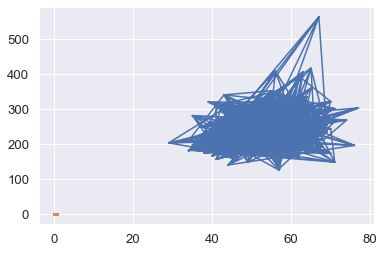

In [81]:
plt.plot('age','chol', data=heart_data);
#plt.plot('age','restecg', data=heart_data);
#plt.plot('sex','thalach', data=heart_data);
#plt.plot('exang','trestbps', data=heart_data);
#plt.plot('thal','trestbps', data=heart_data);
#plt.plot('restecg','ca', data=heart_data);
#plt.plot('thal','thalach', data=heart_data);
plt.plot('exang','restecg', data=heart_data);




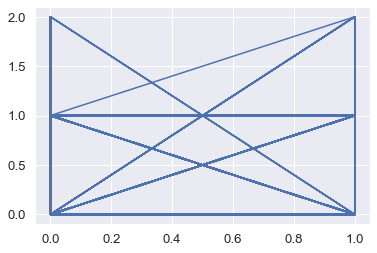

In [82]:
plt.plot('exang','restecg', data=heart_data);



/Users/aishatolatunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


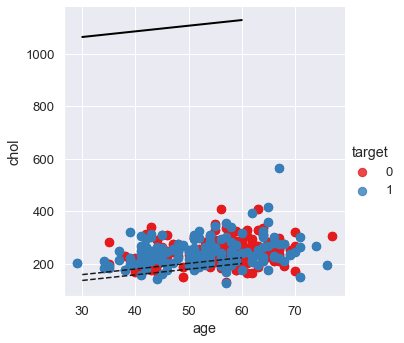

In [85]:
sns.lmplot('age','chol', data=heart_data,hue='target',palette = 'Set1',fit_reg=False, scatter_kws= {"s":70});
plt.plot(xx, yy, linewidth=2,color='black')
plt.plot(xx, yy_down,'k--')
plt.plot(xx, yy_up,'k--')

since age and chol seemsto be overly clustered let try something out.

In [92]:
subset=heart_data[['age','chol']].values
print(subset)

[[ 52 212]
 [ 53 203]
 [ 70 174]
 ...
 [ 47 275]
 [ 50 254]
 [ 54 188]]


In [93]:
model = svm.SVC(kernel='linear')
model.fit(subset,heart_data['target'])

SVC(kernel='linear')

create a function to predict the present or absent of heart disease using selected attribute.

In [106]:
def desease_or_no_disease(age,chol):
    if(model.predict([[age,chol]]))==0:
        print("Disease is absent")  
    else:
        print("Disease is present")
        
desease_or_no_disease(45,212)


"""" more like deploying a model to detect when there is disease)"""

Disease is present


'" more like deploying a model to detect when there is disease)'

In [107]:
desease_or_no_disease(0,0)

Disease is present
